In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from files.Simulation import Simulation
from files.Source import Source
from files.Observer import Observer

## Simulation setup

#### Parameters

In [2]:
nr_particles = 10**1
nr_steps = 1*10**5
source_pos = np.array([0.0, 0.0, 0.0], dtype=np.float32)
delta_rho_div_phi = 1.0 # (delta_r_rho / delta_r_phi)
gyro_radius = 10**11 # [m]
observer_substeps = np.array([True, True, True]) #np.array([True, True, True])
mean_free_path = np.array([2.13*10**12/2.0, 2.13*10**12/2.0, 2.1078*10**12])  # [m]
observer_spheres = np.array([-1.0]) # np.array([1.0*10**16, 1.0*10**17, 1.0*10**18, 1.0*10**19, 1.0*10**20]) # np.array([-1.0]) is just a time evolution observer

In [3]:
sim = Simulation()

source = Source(gyro_radius, mean_free_path, source_pos, nr_particles)
sim.add_source(source)

observer = Observer(observer_substeps)
sim.add_observer(observer)

%time sim.run_simulation(nr_steps)
sim.save_data('data')

start simulation
source
observer
CPU times: user 11.9 s, sys: 574 ms, total: 12.5 s
Wall time: 12.5 s


## Analyze trajectories

Even though individual trajectories of particles performing a random walk have no physical meaning, their visualization is helpful in many respects:
- 1. The visualization of the substeps clarifies whether the implementation works as desired
- 2. The initial ballistic character of the propagation becomes visible
- 3. The diffusive character becomes visible on large time scales

First load simulated data file and create a trajectory object. As we simulated a 3d trajectory, we choose 3 dimensions and initialize the object with the dataframe. We also want to get a list of ids of our particles.

In [4]:
from plot.Trajectory import Trajectory

df = pd.read_pickle("data.pkl")
df_time_evolution_observer = df.loc[df['radius'] == -1.0]
dimensions = 3
tra = Trajectory(df_time_evolution_observer, dimensions)
particle_ids = tra.get_particle_ids()

init trajectory plotting class


#### 1. Substeps
The visualization of the substeps clarifies whether the implementation works as desired. We choose only a few steps of a single particle to have a good resolution.

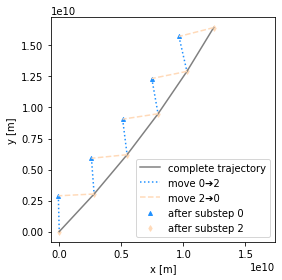

In [5]:
substep_0 = 0 # positions after 1. substep
substep_1 = 2 # positions after 3. substep -> final position after each step for 3d
nr_steps = 5
file_name = None # where to save figure (None doesn't save a figure)
tra.plot_trjectory_substeps(substep_0, substep_1, particle_ids[0], nr_steps, file_name)

#### 2. Ballistic movement
The initial ballistic character of the propagation becomes visible when plotting only a few steps.

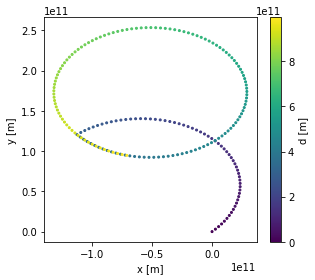

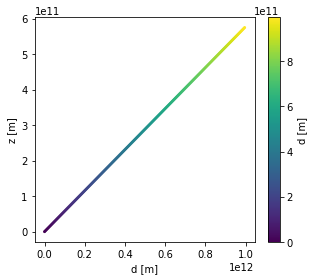

In [6]:
nr_steps = 2*10**2
tra.plot_trajectory('x', 'y', 'd', particle_ids[0], nr_steps, None)
tra.plot_trajectory('d', 'z', 'd', particle_ids[0], nr_steps, None)

#### 3. Diffusive behaviour
The diffusive character becomes visible on large time scales.

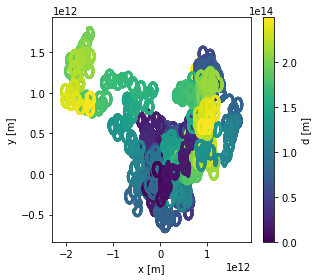

In [7]:
nr_steps = 5*10**4
tra.plot_trajectory('x', 'y', 'd', particle_ids[:4], nr_steps, None)